# Probability and Statistics

Let's do some stats with `numpy`! Import `numpy` to get started. Import `matplotlib.pyplot` and `seaborn` too for visualisation.

In [1]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Warmup

Consider two independent dice rolls, **what is the probability that the product of the numbers is even**?

1. Compute the probability manually
1. Then perform a simulation and observe the result:
    1. set the random seed at `193` for reproducibility
    1. using `np.random.randint` you can generate rolls
    1. generate 10,000 experiments where you generate two rolls and count how many times the result is even (use `np.mod`, an even number has `np.mod(number, 2) == 0`)
    1. does it match? (hint: it should)

**Note**: it is much faster to pre-generate all the random-numbers for the experiments rather than generate numbers for each experiment. 

In [2]:
# compute the result manually, one way is
# to compute all the possible pairs and check!
pairs = []
# note that range does not take the end boundary so (1, 7) is 1, 2, 3, 4, 5, 6
for i in range(1, 7):
    for j in range(1, 7):
        pairs.append((i, j))

s = [np.mod(np.prod(s), 2) == 0 for s in pairs]
print("Exact probability: {0:.2f}".format(sum(s) / len(s)))
# now do the simulation of 10,000 rolls and compare results
np.random.seed(193)
n = 10000
# generate 2*n numbers between 1 and 6 and shape them as two columns
a = np.reshape(np.random.randint(1, 7, 2*n), (n, 2))
# compute the products per row and check whether it's even or not
r = sum(np.mod(np.prod(a[i, :]), 2) == 0 for i in range(n)) / n
print("Empirical probability: {0:.3f}".format(r))


Exact probability: 0.75
Empirical probability: 0.752


## Working with realisations (1)

* seed the random number generator to `987` (it's good practice not to stick with the same seed)
* using `np.random.randint`, generate 1000 random numbers between 1 and 6, this amounts to rolling a die 1000 times
* manually compute the mean, median, variance then check with functions from numpy (`np.mean`,`np.median`,`np.var`) remember that:

The sample mean is computed as $\sum_i x_i / n$, the sample variance as $\sum_i x_i^2/n - (\sum_i x_i/n)^2$. 
To get the median, you need to sort the values then pick the middle one. If there is no middle one, you need to take the average of the middle pair (see [wikipedia](https://en.wikipedia.org/wiki/Median)). (**Bonus**: write it as a function and test it)

In [3]:
# seed the random number generator and roll the dice 20 times
np.random.seed(987)
rolls = np.random.randint(1, high=7, size=1000)
# compute the mean and variance manually then using numpy
print("Mean (manually): {0:.2f}, numpy: {1:.2f}".format(
        sum(rolls)/len(rolls), 
        np.mean(rolls) ))
print("Var (manually): {0:.2f}, numpy: {1:.2f}".format(
        sum(rolls**2)/len(rolls)-(sum(rolls)/len(rolls))**2, 
        np.var(rolls) ))


Mean (manually): 3.52, numpy: 3.52
Var (manually): 2.87, numpy: 2.87


In [4]:
# define a function mymed to get the median of a numpy vector
def mymed(x):
    if len(x) <= 1:
        return x
    else:
        sx = np.sort(x)
        if not np.mod(len(x), 2): # length is even
            m = (len(x) // 2)
            return sum(sx[[m - 1, m]])/2 # compute midpoint
        else: # length is odd
            return sx[(len(x) + 1) // 2 - 1] # take midpoint
# bonus: use numpy.testing.assert_array_equal to test your function
np.testing.assert_array_equal(mymed(np.array([])), [])
np.testing.assert_array_equal(mymed(np.array([1])), 1)
np.testing.assert_array_equal(mymed(np.array([1, 2])), 1.5)
np.testing.assert_array_equal(mymed(np.array([1, 2, 3])), 2)


In [5]:
# apply it to your realisations and compare with np.median
print("My median: {0:.2f}, numpy: {1:.2f}".format(
        mymed(rolls), np.median(rolls) ))


My median: 4.00, numpy: 4.00


## Working with realisations (2)

* Set the seed to `4378` for reproducibility
* Generate 1000 realisations from a Laplace distribution with location parameter set to `1.0` and spread to `2.0` using `np.random.laplace`
* Use `sns.distplot` to have a look at the distribution

What can you say about the distribution?

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


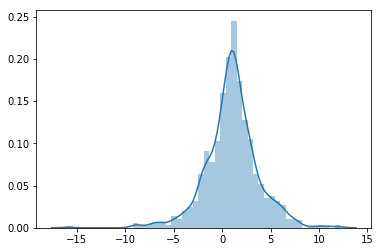

In [6]:
# generate the realisations
np.random.seed(4378)
mu, lambd, n = 1.0, 2.0, 1000
# generate `n` random number using the laplace generator
realx = np.random.laplace(loc=mu, scale=lambd, size=n)
sns.distplot(realx)
